In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

# Plotgröße festlegen
mpl.rcParams['figure.figsize'] = (10, 7)

# Klassifizierung

### Daten definieren

In [4]:
# Anzahl gehörter Info-/Biovorlesungen
informatik = np.array([0, 0, 2, 3, 4, 4, 4, 5, 6, 7])
bio = np.array([0, 1, 1, 2, 2, 4, 5, 5, 6, 6])
X = np.c_[informatik, bio]

# 0: kein Interesse | 1: Interesse
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

X_0 = X[y == 0] # alle Datenpunkte mit y = 0
X_1 = X[y == 1] # alle Datenpunkte mit y = 1

### Daten aufteilen

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

### Daten visualisieren

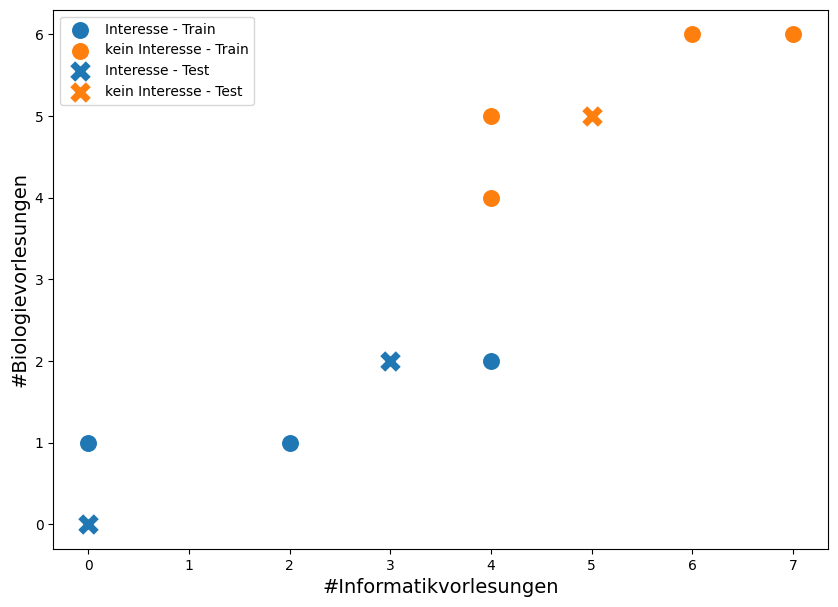

In [6]:
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1]

plt.scatter(X_train_0[:,0], X_train_0[:,1], label="Interesse - Train", color='#1f77b4', s=125)
plt.scatter(X_train_1[:,0], X_train_1[:,1], label="kein Interesse - Train", color='#ff7f0e', s=125)

plt.scatter(X_test_0[:,0], X_test_0[:,1], marker="x", label="Interesse - Test", color='#1f77b4', s=125, linewidth=5)
plt.scatter(X_test_1[:,0], X_test_1[:,1], marker="x", label="kein Interesse - Test", color='#ff7f0e', s=125, linewidth=5)

plt.xlabel("#Informatikvorlesungen", fontsize=14)
plt.ylabel("#Biologievorlesungen", fontsize=14)
plt.legend()
plt.show()

### Vorhersage

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [8]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
from IPython.display import Image

export_graphviz(tree_classifier, out_file="tree_classifier.dot",
feature_names=["Informatik", "Bio"],
class_names=["Interesse", "kein Interesse"],
rounded=True, filled=True)
!dot -Tpng tree_classifier.dot -o tree_classifier.png
Image(filename='tree_classifier.png')

/bin/bash: line 1: dot: command not found


FileNotFoundError: [Errno 2] No such file or directory: 'tree_classifier.png'

### Decision Boundary visualisieren

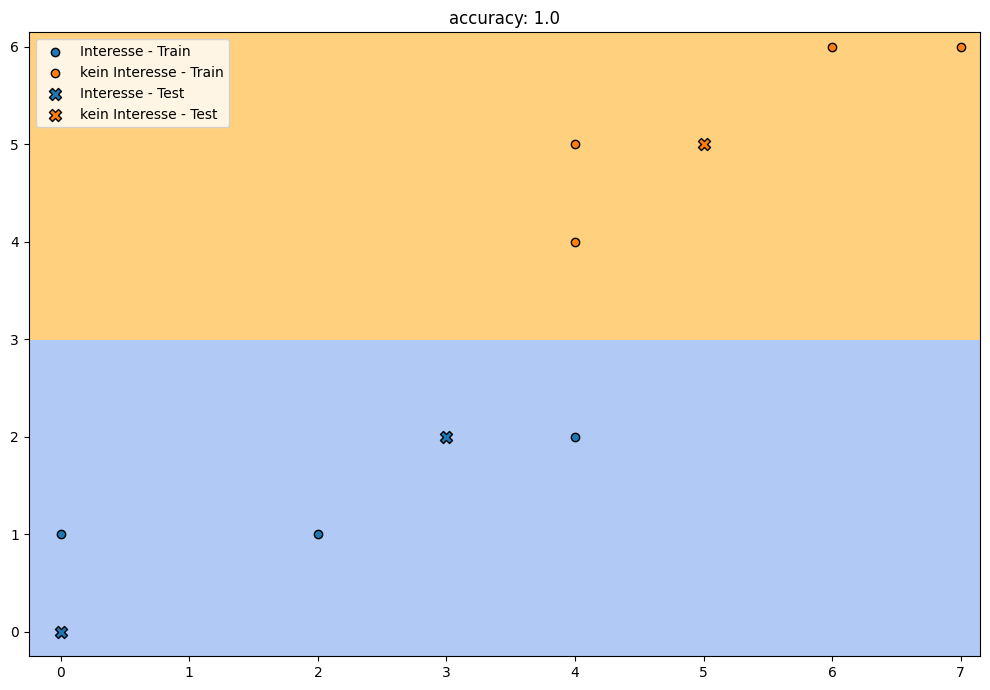

In [11]:
res = 0.1  # Auflösung des Grids

# Intervallgrenzen
x_max, y_max = np.max(X, axis=0) + 0.25 
x_min, y_min = np.min(X, axis=0) - 0.25

# Colormap definieren
cmap_light = ListedColormap([ 'cornflowerblue', 'orange'])

# Grid definieren
grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, res),
                             np.arange(y_min, y_max, res))
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

# Vorhersagen und score berechnen
tree_classifier_score = tree_classifier.score(X_test, y_test)
tree_classifier_grid_out = tree_classifier.predict(grid_input).reshape(grid_x.shape)

# Plot erstellen
plt.title(f'accuracy: {np.round(tree_classifier_score,2)}')
plt.contourf(grid_x, grid_y, tree_classifier_grid_out, alpha=0.5, cmap=cmap_light) #plt.cm.cividis)

plt.scatter(X_train_0[:,0], X_train_0[:,1], label="Interesse - Train", edgecolor='k')
plt.scatter(X_train_1[:,0], X_train_1[:,1], label="kein Interesse - Train", edgecolor='k')

plt.scatter(X_test_0[:,0], X_test_0[:,1], s=75, label="Interesse - Test", marker="X", edgecolor='k', color='#1f77b4')
plt.scatter(X_test_1[:,0], X_test_1[:,1], s=75, label="kein Interesse - Test", marker="X", edgecolor='k', color='#ff7f0e')

plt.tight_layout()
plt.legend()
plt.show()
plt.close()

# Regression

### Daten definieren und aufteilen

In [14]:
y = np.array([0.7, 1.2, 2.5, 3, 2.8, 5.1, 6.7, 7.38710581, 8, 9.8])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

### Daten visualisieren

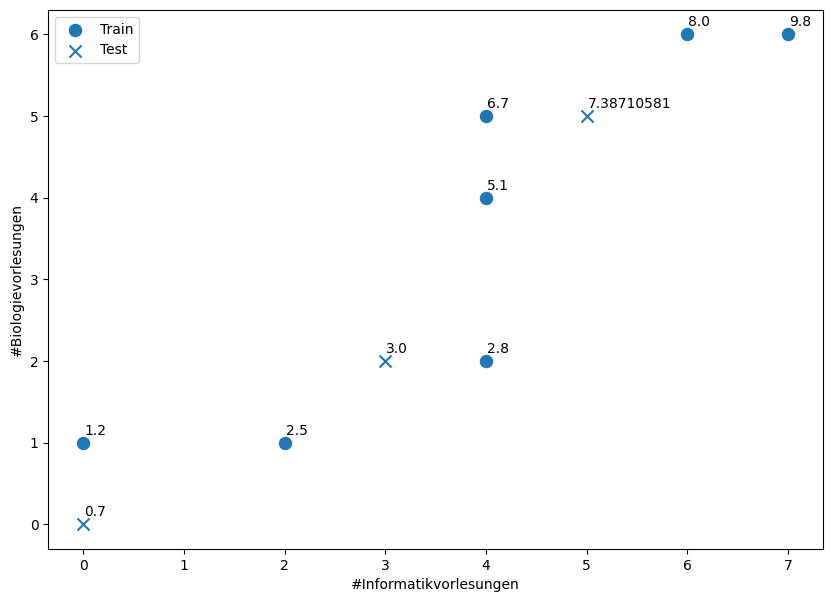

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], color='#1f77b4', label="Train", s=75)

plt.scatter(X_test[:,0], X_test[:,1], marker="x", color='#1f77b4', label="Test", s=75)

for i in range(10):
    plt.annotate(y[i], (X[i][0]+0.01, X[i][1]+0.1))

plt.xlabel("#Informatikvorlesungen")
plt.ylabel("#Biologievorlesungen")
plt.legend()

plt.show()

### Vorhersage

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [18]:
from IPython.display import Image

export_graphviz(tree_regressor, out_file="tree_regressor.dot",
feature_names=["Informatik", "Bio"],
rounded=True, filled=True)
!dot -Tpng tree_regressor.dot -o tree_regressor.png
Image(filename='tree_regressor.png')

/bin/bash: line 1: dot: command not found


FileNotFoundError: [Errno 2] No such file or directory: 'tree_regressor.png'

### Decision Boundary visualisieren

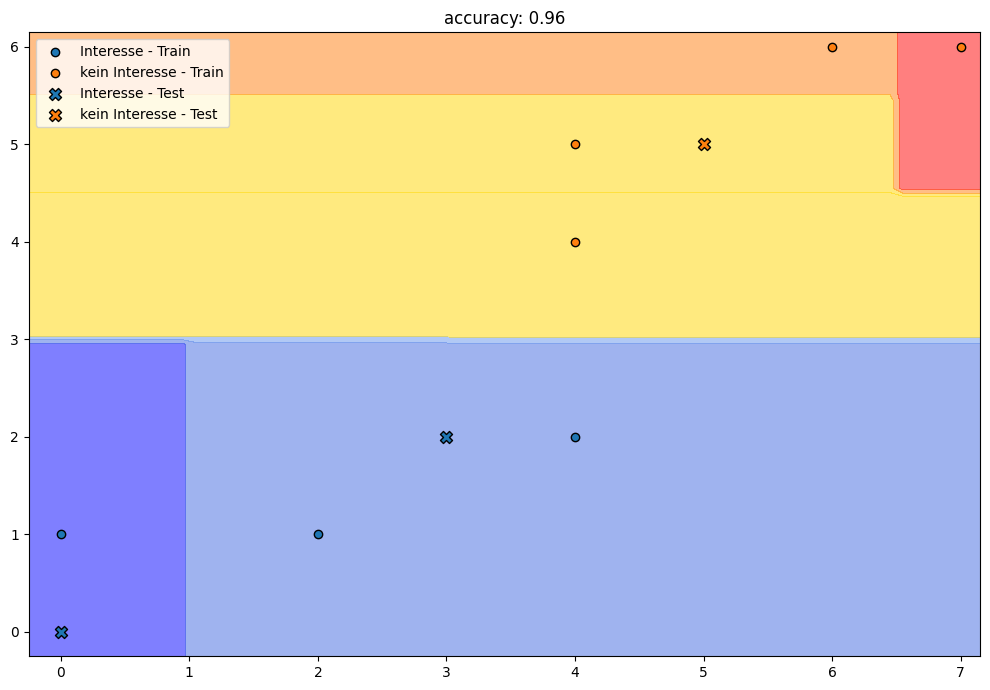

In [19]:
res = 0.1  # Auflösung des Grids

# Intervallgrenzen
x_max, y_max = np.max(X, axis=0) + 0.25 
x_min, y_min = np.min(X, axis=0) - 0.25

# Colormap definieren
cmap_light = ListedColormap(['blue', 'royalblue', 'cornflowerblue', 'gold', 'tab:orange', 'red'])

# Grid definieren
grid_x, grid_y = np.meshgrid(np.arange(x_min, x_max, res),
                             np.arange(y_min, y_max, res))
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

# Vorhersagen und score berechnen
tree_regressor_score = tree_regressor.score(X_test, y_test)
ttree_regressor_grid_out = tree_regressor.predict(grid_input).reshape(grid_x.shape)

# Plot erstellen
plt.title(f'accuracy: {np.round(tree_regressor_score,2)}')
plt.contourf(grid_x, grid_y, ttree_regressor_grid_out, alpha=0.5, cmap=cmap_light) #plt.cm.cividis)

plt.scatter(X_train_0[:,0], X_train_0[:,1], label="Interesse - Train", edgecolor='k')
plt.scatter(X_train_1[:,0], X_train_1[:,1], label="kein Interesse - Train", edgecolor='k')

plt.scatter(X_test_0[:,0], X_test_0[:,1], s=75, label="Interesse - Test", marker="X", edgecolor='k', color='#1f77b4')
plt.scatter(X_test_1[:,0], X_test_1[:,1], s=75, label="kein Interesse - Test", marker="X", edgecolor='k', color='#ff7f0e')

plt.tight_layout()
plt.legend()
plt.show()
plt.close()